# Reuters News Classification
- https://wikidocs.net/22933

## Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

## Load dataset

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8982,), (8982,), (2246,), (2246,))

In [4]:
y_train[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [5]:
num_classes = max(y_train) + 1
print(f"num of categoris: {num_classes}")

num of categoris: 46


In [6]:
print(x_train[0], y_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12] 3


뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.5398574927633


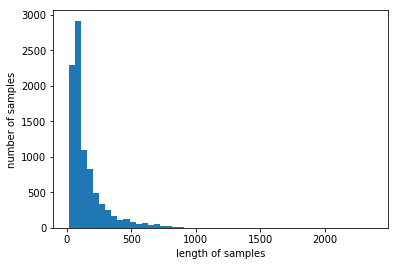

In [7]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

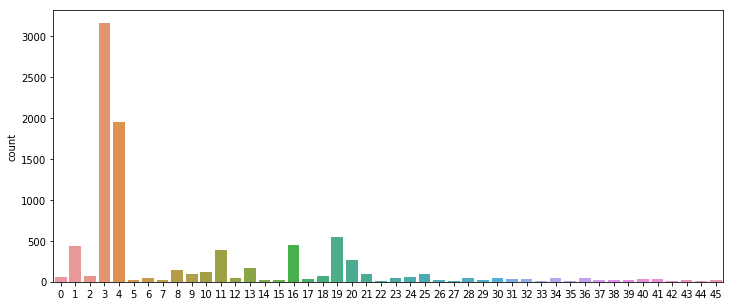

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [9]:
import collections

In [18]:
(sorted([(i, j) for i, j in collections.Counter(y_train).items()]))

[(0, 55),
 (1, 432),
 (2, 74),
 (3, 3159),
 (4, 1949),
 (5, 17),
 (6, 48),
 (7, 16),
 (8, 139),
 (9, 101),
 (10, 124),
 (11, 390),
 (12, 49),
 (13, 172),
 (14, 26),
 (15, 20),
 (16, 444),
 (17, 39),
 (18, 66),
 (19, 549),
 (20, 269),
 (21, 100),
 (22, 15),
 (23, 41),
 (24, 62),
 (25, 92),
 (26, 24),
 (27, 15),
 (28, 48),
 (29, 19),
 (30, 45),
 (31, 39),
 (32, 32),
 (33, 11),
 (34, 50),
 (35, 10),
 (36, 49),
 (37, 19),
 (38, 19),
 (39, 24),
 (40, 36),
 (41, 30),
 (42, 13),
 (43, 21),
 (44, 12),
 (45, 18)]

In [19]:
word_to_index = reuters.get_word_index()
len(word_to_index)

30979

In [20]:
index_to_word = {index:word for word, index in word_to_index.items()}
len(index_to_word)

30979

In [24]:
index_to_word[1], index_to_word[2], index_to_word[3], index_to_word[4], index_to_word[5]

('the', 'of', 'to', 'in', 'said')

In [25]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token
    
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


In [27]:
index_to_word[0], index_to_word[1], index_to_word[2], index_to_word[3], index_to_word[4], index_to_word[5]

('<pad>', '<sos>', '<unk>', 'to', 'in', 'said')

## Text preprocessing

In [29]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8982,), (8982,), (2246,), (2246,))

In [30]:
max_len = 100
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
len(x_train[0]), len(x_test[0])

(100, 100)

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

## Define model

In [32]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation="softmax"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 120)         120000    
_________________________________________________________________
lstm (LSTM)                  (None, 120)               115680    
_________________________________________________________________
dense (Dense)                (None, 46)                5566      
Total params: 241,246
Trainable params: 241,246
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 검증 데이터 손실이 4회 증가하면 학습을 조기 종료(Early Stopping)
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=4)
mc = ModelCheckpoint("best_model.h5", monitor="val_acc", mode="max", verbose=1, save_best_only=True)

In [36]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"]
)

## Train

In [37]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/30
8960/8982 [============================>.] - ETA: 0s - loss: 2.6211 - acc: 0.3487
Epoch 00001: val_acc improved from -inf to 0.36198, saving model to best_model.h5
8982/8982 [==============================] - 18s 2ms/sample - loss: 2.6209 - acc: 0.3487 - val_loss: 2.3822 - val_acc: 0.3620
Epoch 2/30
8960/8982 [============================>.] - ETA: 0s - loss: 2.1400 - acc: 0.4584
Epoch 00002: val_acc improved from 0.36198 to 0.50089, saving model to best_model.h5
8982/8982 [==============================] - 19s 2ms/sample - loss: 2.1391 - acc: 0.4588 - val_loss: 2.0341 - val_acc: 0.5009
Epoch 3/30
8960/8982 [============================>.] - ETA: 0s - loss: 1.9528 - acc: 0.5089
Epoch 00003: val_acc improved from 0.50089 to 0.52894, saving model to best_model.h5
8982/8982 [==============================] - 21s 2ms/sample - loss: 1.9519 - acc: 0.5095 - val_loss: 1.8429 - val_acc: 0.5289
Epoch 4/30
8960/8982 [=====================

In [40]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test, verbose=2)[1]))

2246/1 - 1s - loss: 1.5527 - acc: 0.7173

 테스트 정확도: 0.7173



 테스트 정확도: 0.7173


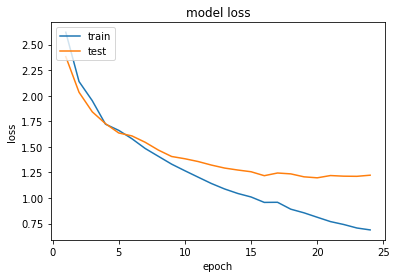

In [39]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()